<a href="https://colab.research.google.com/github/dylanscoggins/CSCE4205Project/blob/dylan/Group0Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Imports

In [317]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import pathlib
import glob
import cv2
import os
import re

# Mount Google Drive

In [258]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Helper Functions

In [259]:
# Credit to https://www.kaggle.com/reddieeddie
def get_row(df, col, name):
  return df[df[col]==name]

In [260]:
# Assigns an index label for each Pokémon type
# I'm sure there's a much more elegant solution for this, but it works

index = []

for i in pokeTypes:
  if i == 'Bug':
    index.append(0)
  elif i == 'Dark':
    index.append(1)
  elif i == 'Dragon':
    index.append(2)
  elif i == 'Electric':
    index.append(3)
  elif i == 'Fairy':
    index.append(4)
  elif i == 'Fighting':
    index.append(5)
  elif i == 'Fire':
    index.append(6)
  elif i == 'Flying':
    index.append(7)
  elif i == 'Ghost':
    index.append(8)
  elif i == 'Grass':
    index.append(9)
  elif i == 'Ground':
    index.append(10)
  elif i == 'Ice':
    index.append(11)
  elif i == 'Normal':
    index.append(12)
  elif i == 'Poison':
    index.append(13)
  elif i == 'Psychic':
    index.append(14)
  elif i == 'Rock':
    index.append(15)
  elif i == 'Steel':
    index.append(16)
  else:
    index.append(17)

# Import Data Sets

In [261]:
# Download .csv data sets from GitHub repository
# Link to repo: https://github.com/dylanscoggins/CSCE4205Project
pokemonDataSet01 = 'https://raw.githubusercontent.com/dylanscoggins/CSCE4205Project/main/PokemonDataSet01.csv'
ds1 = pd.read_csv(pokemonDataSet01)

pokemonDataSet02 = 'https://raw.githubusercontent.com/dylanscoggins/CSCE4205Project/main/PokemonDataSet02.csv'
ds2 = pd.read_csv(pokemonDataSet02)

# Associate images with Pokémon in ds2
# Credit to https://www.kaggle.com/reddieeddie for the framework to set up Pokédex
pokedex = '/content/gdrive/MyDrive/CSCE 4205/Project Data/Imagesv2/'
fileNames = os.listdir(pokedex)
pokeNames, pokeTypes = [], []
for path in os.listdir(pokedex):
  name = re.search(r"^([^.]*).*", path).group(1)
  pokeNames.append(name.capitalize())
  pokeTypes.append(ds2['Type1'][int(get_row(ds2, 'Name', name).index.values)])

numImgs = len(fileNames)
print("Pokédex contains", numImgs, "Pokémon")

col1 = fileNames  # Image File
col2 = pokeNames  # Pokémon Name
col3 = pokeTypes  # Pokémon Type
col4 = index      # Assigned Label: range(0,18)

pokemonDF = pd.DataFrame({'Image': col1, 'Pokémon': col2, 'Class': col3, 'Label': col4})
pokemonDF

Pokédex contains 809 Pokémon


,Image,Pokémon,Class,Label
0,accelgor.png,Accelgor,Bug,0
1,alakazam.png,Alakazam,Psychic,14
2,alomomola.png,Alomomola,Water,17
3,amaura.png,Amaura,Rock,15
4,aipom.png,Aipom,Normal,12
...,...,...,...,...
804,zoroark.png,Zoroark,Dark,1
805,zigzagoon.png,Zigzagoon,Normal,12
806,zorua.png,Zorua,Dark,1
807,zubat.png,Zubat,Poison,13


# Preprocess the DataFrame

Reference: https://stackoverflow.com/questions/37747021/create-numpy-array-of-images

In [ ]:
class_labels = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']

In [265]:
# NOTE: This part can potentially take 1min+ to finish executing.
# Sometimes seems to hang on something, may need to interrupt and re-execute.
imgs = []
files = glob.glob('/content/gdrive/MyDrive/CSCE 4205/Project Data/Imagesv2/*.png')
for i in files:
  img = cv2.imread(i)
  imgs.append(img)

imgs = np.array(imgs)
imgs.shape

(809, 120, 120, 3)

In [266]:
# Split dataframe into train/test sets
# random_state is used for reproducibility purposes
train_df, test_df = train_test_split(pokemonDF, test_size=0.2, random_state=42)

In [267]:
# Only need the labels from the train/test dataframes
train_labels = train_df[['Label']].copy()
test_labels = test_df[['Label']].copy()

In [268]:
# Split images into train/test sets
# random_state=42 same as df split to ensure labels match the images
train_imgs, test_imgs = train_test_split(imgs, test_size=0.2, random_state=42)

In [271]:
# Convert the label sets to be numpy arrays
train_labels = train_labels.to_numpy()
test_labels = test_labels.to_numpy()

In [277]:
# flatten labels to be 1 dimension
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

Both the Test and Training sets need to have the same 1s dimensions in order to work with the model.

In [308]:
print(train_labels.shape[0],',',train_imgs.shape[0])

647 , 647


In [307]:
print(test_labels.shape[0],',',test_imgs.shape[0])

162 , 162


# Data Evaluation
### Making sure images are correctly imported and labeled.

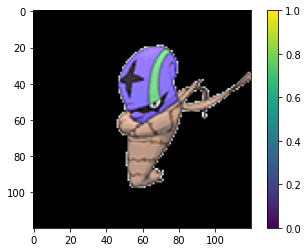

In [282]:
# Example of the 1st image in the imgs list
# Images start on a scale of 0-255, after rescaling
# run this code again and the scale will be updated.
plt.figure()
plt.imshow(imgs[0])
plt.colorbar()
plt.grid(False)
plt.show()

Images need to be on a scale of 0-1.

In [281]:
imgs = imgs / 255.0

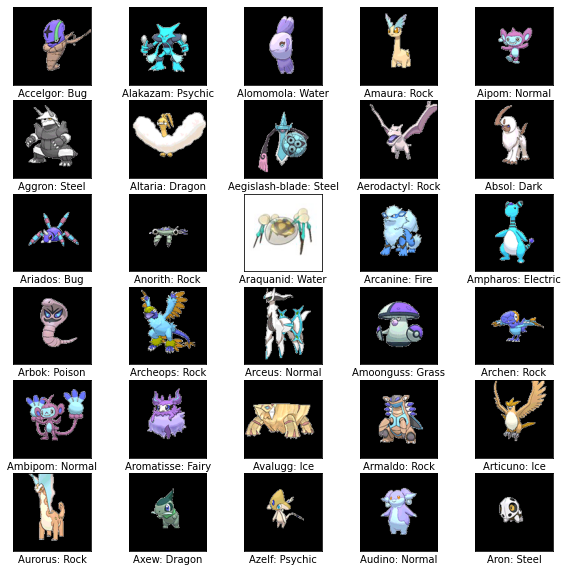

In [283]:
# Demonstrates that each image has the correct label attached
plt.figure(figsize=(10,10))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imgs[i], cmap=plt.cm.binary)
  plt.xlabel(pokeNames[i] + ": " + pokeTypes[i])
plt.show()

# Building the NN Model

In [313]:
# Builds the NN layers
# input_shape: image sizes (120x120 pixels)
# 1st Dense layer:
# 2nd Dense layer: 18 refers to the unique Pokémon Primary Types
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(120,120,3)),
        tf.keras.layers.Dense(192, activation='relu'),
        tf.keras.layers.Dense(18)
])

# Compilation

In [314]:
# Model needs to be compiled before it can handle the test/train sets
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model Training

In [315]:
model.fit(train_imgs, train_labels, epochs=10)

Epoch 1/10
21/21 [==============================] - 1s 43ms/step - loss: 2617.0535 - accuracy: 0.0866
Epoch 2/10
21/21 [==============================] - 1s 43ms/step - loss: 2242.2393 - accuracy: 0.1623
Epoch 3/10
21/21 [==============================] - 1s 43ms/step - loss: 1356.5760 - accuracy: 0.2210
Epoch 4/10
21/21 [==============================] - 1s 45ms/step - loss: 928.4066 - accuracy: 0.2643
Epoch 5/10
21/21 [==============================] - 1s 43ms/step - loss: 1065.2887 - accuracy: 0.2040
Epoch 6/10
21/21 [==============================] - 1s 43ms/step - loss: 657.5828 - accuracy: 0.2504
Epoch 7/10
21/21 [==============================] - 1s 44ms/step - loss: 275.6546 - accuracy: 0.1283
Epoch 8/10
21/21 [==============================] - 1s 43ms/step - loss: 672.3240 - accuracy: 0.0974
Epoch 9/10
21/21 [==============================] - 1s 43ms/step - loss: 561.3036 - accuracy: 0.1422
Epoch 10/10
21/21 [==============================] - 1s 42ms/step - loss: 104.6039 - ac

After each epoch the model's loss and accuracy are displayed. Given the current data set the model is ~12-13% accurate. Varying by < 1%.

In [316]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)

print('\nAccuracy:', test_acc)

6/6 - 0s - loss: 3.1460 - accuracy: 0.1975

Accuracy: 0.1975308656692505


Given the difference between the accuracy of the test set vs the training set this shows that the model is overfitting. This can vary by as much as nearly 10%. Even when overfitting the model has only been able to achieve ~20% accuracy at best on the testing set.

# Model Predictions
Reference: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb#scrollTo=DvYmmrpIy6Y1

In [288]:
prob_model = tf.keras.Sequential([model,
                                  tf.keras.layers.Softmax()])

In [289]:
predict = prob_model.predict(test_imgs)

The model makes a prediction for an image in the test set

In [290]:
predict[0]

array([0.05982187, 0.05337323, 0.0514234 , 0.05678699, 0.04995716,
       0.05493305, 0.05631742, 0.05091953, 0.0534026 , 0.05957313,
       0.05462519, 0.05281443, 0.06160638, 0.05465774, 0.05791527,
       0.05763631, 0.05231724, 0.06191901], dtype=float32)

As you can see from the prediction above, the models confidence when making a prediction is not very high. There are a number of possible causes for this, many of which will be explained in the report.

In [291]:
np.argmax(predict[0])

17

The model predicts that for the given Pokémon image it should be of primary type 17, which corresponds to Water.

In [292]:
test_labels[0]

1

As expected, given the models accuracy, it is incorrect. The given image has a primary type of 1, which corresponds to Dark.